In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/code-to-start/__results__.html
/kaggle/input/code-to-start/__resultx__.html
/kaggle/input/code-to-start/__notebook__.ipynb
/kaggle/input/code-to-start/__output__.json
/kaggle/input/code-to-start/custom.css
/kaggle/input/code-to-start/__results___files/__results___18_1.png
/kaggle/input/code-to-start/__results___files/__results___62_1.png
/kaggle/input/code-to-start/__results___files/__results___15_1.png
/kaggle/input/code-to-start/__results___files/__results___32_1.png
/kaggle/input/code-to-start/__results___files/__results___21_1.png
/kaggle/input/mental-stress-ppg/data.csv


In [2]:
%%capture
## !pip install antropy -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import statistics as st
# from antropy import *


In [4]:
df = pd.read_csv('../input//mental-stress-ppg/data.csv')
df.head()

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(df)

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub_6,normal,618.0,638.0,2030.0,1330.0,1432.0,1388.0,1302.0,782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sub_7,normal,632.0,670.0,724.0,700.0,740.0,760.0,730.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sub_8,normal,330.0,624.0,740.0,772.0,690.0,728.0,828.0,810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sub_9,normal,426.0,774.0,748.0,666.0,664.0,668.0,674.0,852.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,sub_10,normal,662.0,668.0,742.0,760.0,732.0,774.0,790.0,758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Separate data and labels. First column corresponds to labels.

In [6]:
# data = df.iloc[:,2::].T
# labels=df.iloc[:,1].T

# # pandas.DataFrame.T property is used to transpose index and columns of the data
# # frame. Main function of this property is to create a reflection of the data frame over the main diagonal by 
# # making rows as columns and vice versa.

Print first and last 5 rows of data and labels

In [7]:
# data.head()

In [8]:
# data['Label']=labels

# data.shape

In [9]:
# labels.head()

# # labels.shape
data = df
display(data)

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub_6,normal,618.0,638.0,2030.0,1330.0,1432.0,1388.0,1302.0,782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,sub_7,normal,632.0,670.0,724.0,700.0,740.0,760.0,730.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sub_8,normal,330.0,624.0,740.0,772.0,690.0,728.0,828.0,810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,sub_9,normal,426.0,774.0,748.0,666.0,664.0,668.0,674.0,852.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,sub_10,normal,662.0,668.0,742.0,760.0,732.0,774.0,790.0,758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove columns with any missing values
use pandas dropna 

In [10]:
#data.dropna(how='any' , inplace=True , axis=0)
data.dropna(how='any', inplace=True, axis=1)

In [11]:
data.head()

,subject ID,labels,0,1,2,3,4,5,6,7,...,327,328,329,330,331,332,333,334,335,336
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,738.0,746.0,710.0,666.0,692.0,694.0,712.0,688.0,686.0,724.0
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,666.0,694.0,714.0,676.0,660.0,678.0,652.0,674.0,692.0,656.0
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,542.0,606.0,608.0,576.0,594.0,586.0,572.0,558.0,564.0,560.0
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,766.0,744.0,756.0,782.0,784.0,774.0,782.0,808.0,812.0,790.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,632.0,612.0,646.0,626.0,622.0,628.0,644.0,604.0,626.0,618.0


In [12]:
data.shape

# data

(54, 339)

Plot the data

Remove Outlier

Remove outliers such as values greater than 1000 or lower than 600 (Method used)

Other methods that can be explored:
interquartile range

In [13]:
# # data = np.where((data.values>1000) | (data.values<600),np.median(data.values), data.values)

# data=np.where((data.values > 1000) | (data.values<600), np.median(data.values), data.values)

In [14]:
# data.shape

# data

In [15]:
# plt.plot(data[:,0:1], label='Baseline')
# plt.plot(data[:,27:28], label='Stressed')
# plt.xlabel('time')
# plt.ylabel('R-R interval')
# plt.title('Non Outliered Data')
# plt.legend()

# Apply filter to the data [ not used in this notebook ]


Apply any smoothening filter such as Savitzky-Golay filter or moving filter 

In [16]:
# from scipy.signal import savgol_filter
# data = savgol_filter(data,5,3)

In [17]:
# plt.plot(data[:,10:11],label='Non Filtered')
# plt.plot(data[:,10:11],label='Filtered')
# plt.xlabel('time')
# plt.ylabel('R-R Interval')
# plt.title('Savitzky Golay Filtered Data')
# plt.legend()

# Calculate Features [THIS NOTEBOOK USES CWT INSTEAD OF THE METHOD OUTLINED HERE]

Calculate Following features:

1. mean
2. median
3. maximum
4. variance
5. standard deviation
6. maximum
7. minimum

Time Domain Features:

8. ranges
9. rmssd : root mean square of successive differences
10. sdsd : standard deviation of successive differences
11. nni_50 : number of normal-to-normal intervals greater than 50ms
12. pnni_50 : proportion of normal-to-normal intervals > 50ms
13. nni_20 : number of normal-to-normal intervals greater than 20ms. Count of successive heartbeats where time difference exceeds 20ms 
14. pnni_20 : proportion of normal-to-normal intervals greater than 20ms 
15. avg_hr
16. std_hr
17. min_hr
18. max_hr
19. energy
20. abs_sum_diff


In [18]:
# def ranges(x):
#     return x.max() - x.min()

# def rmssd(x):
#     return np.sqrt(np.mean(np.diff(x)**2))

# def sdsd(x):
#     return st.stdev(np.diff(x))

# def nni_50(x):
#     return sum(np.abs(np.diff(x)) > 50)

# def pnni_50(x):
#     return 100* nni_50(x) / len(x)

# def nni_20(x):
#     return sum(np.abs(np.diff(x)) >20)

# def pnni_20(x):
#     return 100 * nni_20(x) / len(x)

# def avg_hr(x):
#     return st.mean(60000/x)

# def std_hr(x):
#     return st.stdev(60000/x)

# def min_hr(x):
#     return min(60000/x)

# def max_hr(x):
#     return max(60000/x)

# def energy(x):
#     return sum(np.square(x))

# def abs_sum_diff(x):
#     # sum of absolute differences (SAD) is a measure of the similarity between signal
#     return sum(np.abs(np.diff(x)))

In [19]:
# data = pd.DataFrame(data)

# # agg() method allows you to apply a function or a list of function names 
# # to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis 

# # time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,ranges,rmssd,
# #                        sdsd,nni_50,pnni_50,nni_20,pnni_20,avg_hr,std_hr,
# #                        min_hr, max_hr,energy,abs_sum_diff,],axis=0)


# # errors encountered due to use of callable functions like np.var, np.median, np.max, and np.min in pandas.agg()
# # n future versions of pandas, these callables will be treated differently,
# # and pandas suggests using their corresponding string equivalents (e.g., "var", "median", "max", "min") instead to ensure compatibility.

# # time_features=data.agg(['mean', 'var', 'median', 'max', 'min',ranges,rmssd,
# #                        sdsd,nni_50,pnni_50,nni_20,pnni_20,avg_hr,std_hr,
# #                        min_hr, max_hr,energy,abs_sum_diff,],axis=0)

In [20]:
# time_features.head()

In [21]:
data.head()

,subject ID,labels,0,1,2,3,4,5,6,7,...,327,328,329,330,331,332,333,334,335,336
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,738.0,746.0,710.0,666.0,692.0,694.0,712.0,688.0,686.0,724.0
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,666.0,694.0,714.0,676.0,660.0,678.0,652.0,674.0,692.0,656.0
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,542.0,606.0,608.0,576.0,594.0,586.0,572.0,558.0,564.0,560.0
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,766.0,744.0,756.0,782.0,784.0,774.0,782.0,808.0,812.0,790.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,632.0,612.0,646.0,626.0,622.0,628.0,644.0,604.0,626.0,618.0


In [22]:
# labels.head()

# Use continous wavelet transform to extract time and frequency domain features

In [23]:
import pywt

In [24]:
wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

# Perform continuous wavelet transform and extract coefficients

In [25]:
# import pandas as pd
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from sklearn.preprocessing import StandardScaler

# sc_Y = StandardScaler()
# Y= sc_Y.fit_transform(data)

# scaled_data = pd.DataFrame(Y)

# row_index = 0 
# # signal = data.iloc[row_index , :].values
# signal = scaled_data.iloc[row_index,2:].values

# # Check the selected signal
# print("Selected PPG signal data for row index", row_index, ":")
# print(signal)

# # set scales for wavelet transform - can adjust this based on analysis
# scales = np.arange(1,271) # following scale used in : https://www.kaggle.com/code/krishd123/galva-sensing-study-of-gsr-signals/notebook

# #  perform Continuous Wavelet Transform using 'morl' wavelet - Morlet is common for time-frequency analysis

# coefficients , frequencies = pywt.cwt(signal,scales,'morl')

# # coefficients is a 2D array where rows are scales and columns are time points
# # now can extract features from these coefficients

# # display the shape of coefficients
# print("Coefficients Shape:" , coefficients.shape)

# # average of the coefficients across scales or time to use as features
# mean_coefficients = np.mean(coefficients , axis=1) # mean across...
# variance_coefficients = np.var(coefficients , axis=1)
# max_coefficients = np.max(coefficients , axis =1)
# kurtosis_coefficients = stats.kurtosis(coefficients , axis =1)

# features_df = pd.DataFrame({
#     'Mean Coefficient': mean_coefficients , 
#     'Variance Coefficient': variance_coefficients,
#     'Max Coefficient' : max_coefficients,
#     'Kurtosis Coefficient': kurtosis_coefficients
# })

# features_df['Label']  = scaled_data['labels']

# # display extracted features df
# display(features_df)

In [26]:
# # optionally , plot the scalogram (wavelet coefficients)
# plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(signal), scales[-1], scales[0]], cmap='jet')
# plt.colorbar(label='Magnitude of coefficients')
# plt.xlabel('Time')
# plt.ylabel('Scale')
# plt.title('Wavelet Scalogram')
# plt.show()

# Experiment with various classifiers and evaluate cross validation accuracy

In [27]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')
# Initialize scaling

scaling = StandardScaler()

# scaled_data['labels']=labels

# print("------------Scaled data that is used for training & testing------------")
# display(scaled_data)


# print("------------Shape of Scaled data that is used for training & testing------------")
# print(scaled_data.shape)

# Function to extract wavelet coefficients and flatten them
def extract_wavelet_features(signal, scales, wavelet='morl'):
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet)
    flat_coefficients = coefficients.flatten()
    return flat_coefficients

# Set the scales for wavelet transform
scales = np.arange(1, 271)

# Prepare the feature matrix and labels
features = []
labels = []

# Iterate over each row in the dataset to extract features
for index, row in data.iterrows():
    # Extract the signal data from the row (all columns except the last one for label)
    signal = row[2:].values  # Select all columns except the first two
    label = row['labels']    
    
    wavelet_features = extract_wavelet_features(signal, scales)
    features.append(wavelet_features)
    labels.append(label)

# Convert the features and labels into NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42)

# Apply the imputer to the training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)



# List of classifiers to evaluate
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(max_iter=2000),
    LogisticRegressionCV(max_iter=2000, cv=5)  # Added LogisticRegressionCV
]

# Initialize an empty list to store cross-validation results for each classifier
cv_results = []

# Perform evaluation for each classifier
for clf in classifiers:
    print(f"\n===== {clf.__class__.__name__} =====")
    
    # Perform 5-fold cross-validation on the training data
    cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cross_val, scoring='accuracy')
    
    # Store the mean cross-validation accuracy for plotting
    cv_results.append((clf.__class__.__name__, np.mean(cv_scores)))
    
    # Print the accuracy of each fold
    for i, score in enumerate(cv_scores):
        print(f"Fold {i+1} Accuracy: {score * 100:.2f}%")
    
    # Print average and standard deviation of the cross-validation accuracy
    print(f"\nCross-Validation Accuracy (Mean): {np.mean(cv_scores) * 100:.2f}%")
    print(f"Cross-Validation Accuracy (Std): {np.std(cv_scores) * 100:.2f}%")
    
    # Train the model on the entire training set after cross-validation
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of the model on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Set Accuracy: {test_accuracy * 100:.2f}%")
    
    # Compute the confusion matrix for the test set
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nTest Set Confusion Matrix:")
    print(conf_matrix)
    
    # Print the classification report for the test set
    class_report = classification_report(y_test, y_pred)
    print("\nTest Set Classification Report:")
    print(class_report)

# # Plotting Cross-Validation Accuracy for each classifier
# classifier_names, cv_means = zip(*cv_results)

# plt.figure(figsize=(10, 6))
# plt.barh(classifier_names, cv_means, color='skyblue')
# plt.xlabel('Mean Cross-Validation Accuracy')
# plt.title('Comparison of Classifiers by Cross-Validation Accuracy')
# plt.xlim(0, 1)  # Accuracy is between 0 and 1
# plt.grid(axis='x')
# plt.show()


===== KNeighborsClassifier =====
Fold 1 Accuracy: 33.33%
Fold 2 Accuracy: 66.67%
Fold 3 Accuracy: 44.44%
Fold 4 Accuracy: 37.50%
Fold 5 Accuracy: 37.50%

Cross-Validation Accuracy (Mean): 43.89%
Cross-Validation Accuracy (Std): 11.93%

Test Set Accuracy: 45.45%

Test Set Confusion Matrix:
[[1 5]
 [1 4]]

Test Set Classification Report:
              precision    recall  f1-score   support

      normal       0.50      0.17      0.25         6
      stress       0.44      0.80      0.57         5

    accuracy                           0.45        11
   macro avg       0.47      0.48      0.41        11
weighted avg       0.47      0.45      0.40        11


===== SVC =====
Fold 1 Accuracy: 44.44%
Fold 2 Accuracy: 55.56%
Fold 3 Accuracy: 44.44%
Fold 4 Accuracy: 50.00%
Fold 5 Accuracy: 62.50%

Cross-Validation Accuracy (Mean): 51.39%
Cross-Validation Accuracy (Std): 6.92%

Test Set Accuracy: 54.55%

Test Set Confusion Matrix:
[[3 3]
 [2 3]]

Test Set Classification Report:
             

/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Fold 1 Accuracy: 44.44%
Fold 2 Accuracy: 66.67%
Fold 3 Accuracy: 44.44%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 62.50%

Cross-Validation Accuracy (Mean): 48.61%
Cross-Validation Accuracy (Std): 14.91%


/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Test Set Accuracy: 45.45%

Test Set Confusion Matrix:
[[4 2]
 [4 1]]

Test Set Classification Report:
              precision    recall  f1-score   support

      normal       0.50      0.67      0.57         6
      stress       0.33      0.20      0.25         5

    accuracy                           0.45        11
   macro avg       0.42      0.43      0.41        11
weighted avg       0.42      0.45      0.43        11


===== LogisticRegression =====
Fold 1 Accuracy: 44.44%
Fold 2 Accuracy: 55.56%
Fold 3 Accuracy: 44.44%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 37.50%

Cross-Validation Accuracy (Mean): 41.39%
Cross-Validation Accuracy (Std): 10.03%

Test Set Accuracy: 36.36%

Test Set Confusion Matrix:
[[2 4]
 [3 2]]

Test Set Classification Report:
              precision    recall  f1-score   support

      normal       0.40      0.33      0.36         6
      stress       0.33      0.40      0.36         5

    accuracy                           0.36        11
   macro avg   

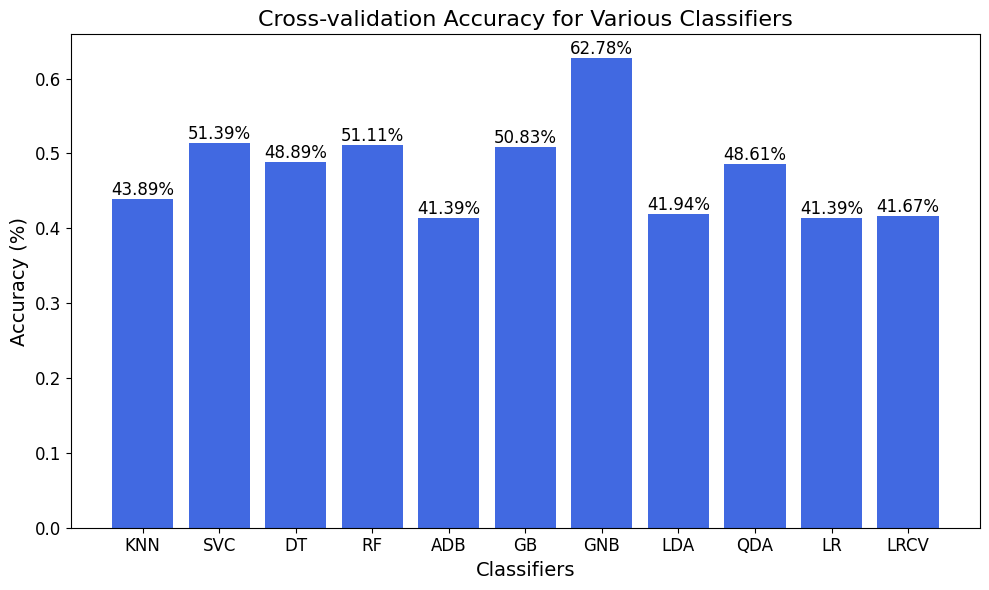

In [28]:
# import matplotlib.pyplot as plt
# classifier = ['KNN', 'SVC', 'DT', 'RF', 'Ada' , 'GB', 'NB','LDA', 'QDA', 'LR']
# mean_accuracies = [result[1] for result in cv_results]  # Extracting accuracies from cv_results

# y_pos =np.arange(len(classifier))
# plt.bar(y_pos , np.array(accuracy))
# ys=np.array(accuracy)
# for index, value in enumerate(ys):
#     plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white', fontsize=12)
#     plt.xticks(y_pos , classifier , fontsize=11)
#     plt.yticks(fontsize=11)
#     plt.ylabel('Accuracy', fontsize=12)
#     plt.xlabel('Classifiers', fontsize=12)
#     plt.title('Cross Validation Accuracy', fontsize=12)
# # plt.savefig('accuracy.svg' , dip=300)


# Extract the mean accuracies from cv_results (already done earlier)
classifier_names = ['KNN', 'SVC', 'DT', 'RF', 'ADB', 'GB', 'GNB', 'LDA', 'QDA', 'LR', 'LRCV'] 
mean_accuracies = [result[1] for result in cv_results]  # Extracting accuracies from cv_results

# Create positions for the bar plot
y_pos = np.arange(len(classifier_names))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(y_pos, mean_accuracies, color='royalblue')

# Add text labels on top of each bar
for index, value in enumerate(mean_accuracies):
    plt.text(index, value + 0.005, str(np.round(value * 100, 2)) + '%', ha='center', fontsize=12, color='black')

# Set tick labels, titles, and axes labels
plt.xticks(y_pos, classifier_names, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Classifiers', fontsize=14)
plt.title('Cross-validation Accuracy for Various Classifiers', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Frequency Features 

In [29]:
# pip install --upgrade scipy

In [30]:
# from scipy import signal 
# from scipy.ndimage import label
# from scipy.stats import zscore
# from scipy.interpolate import interp1d
# from scipy import integrate
# from scipy.integrate import *  # this will include trapz. BUT using a wildcard import is not recommended as 
# # it imports all functions and variables from the scipy.integrate module which can cause namespace pollution, conflicts btw similarly
# # named functions in different libraries

# # from scipy.integrate import trapz
# # from scipy import trapz

# from numpy import trapz # ORIGINALLY USED FROM SCIPY.INTEGRATE IMPORT TRAPZ WHICH DID NOT WORK

In [31]:
# data.shape,len(data)

# Interpolate R-R: 



Convert unevenly spaced data into a uniformly sampled time series
**R-R intervals** in heart rate variability analysis represent the time between successive heartbeats. These intervals are **irregular** as the 
heart rate varies slightly with each beat. 

Most signal processing techniques especially frequency domain analysis (like FFT or Welch's method), require uniformly spaced data (i.e a constant sampling rate)

* To apply methods like Fast Fourier Transform (FFT) or Welch’s method, which are critical for frequency-domain HRV analysis (such as identifying LF, HF, VLF power), 
the data needs to be resampled at a consistent rate. Interpolation allows you to convert the irregular R-R intervals into a regularly sampled signal.

* Improving Resolution for Time-Domain Analysis:

    In time-domain HRV analysis, uniformly spaced data ensures better calculation of features like the Root Mean Square of Successive Differences (RMSSD), Standard Deviation of Normal-to-Normal Intervals (SDNN), and other time-based metrics. Having evenly spaced points makes these calculations more reliable.

* Smoothing the Data (via Cubic Interpolation):

    The cubic interpolation method used in this code not only resamples the data but also smooths it by fitting a cubic curve between data points. This helps reduce noise and capture the physiological trends more effectively.
    
* Sampling at a Desired Frequency (fs=4 Hz):

    After interpolation, the data is resampled at a new frequency (fs = 4 Hz), meaning the new signal will have a regular interval between samples (1/4 seconds or 250 ms). This allows for further analysis using standard techniques that expect regularly sampled signals.

In [32]:
# rr_interpolated=[]
# for i in range(len(data)):
#     rr_manual = data.T[i]
#     x= np.cumsum(rr_manual)/1000.0 # cumulative sum of data
#     f = interp1d(x, rr_manual , kind='cubic',fill_value="extrapolate") # extrapolation
#     fs = 4.0 # new sampling frequency 
#     steps = 1/fs
    
#     # now we can sample from interpolation function
#     xx=np.arange(1, np.max(x),steps)
#     rr_interpolated.append(f(xx))
    
# #  why interpolate R-R: Convert unevenly spaced data into a uniformly sampled time series
# # R-R intervals in heart rate variability analysis represent the time between successive heartbeats. These intervals are irregular as the 
# # heart rate varies slightly with each beat. 

# # most signal processing techniques especially frequency domain analysis (like FFT or Welch's method), require uniformly spaced data (i.e a constant sampling rate)

# # To apply methods like Fast Fourier Transform (FFT) or Welch’s method, which are critical for frequency-domain HRV analysis (such as identifying LF, HF, VLF power), 
# # the data needs to be resampled at a consistent rate. Interpolation allows you to convert the irregular R-R intervals into a regularly sampled signal.

# # Improving Resolution for Time-Domain Analysis:

# # In time-domain HRV analysis, uniformly spaced data ensures better calculation of features like the Root Mean Square of Successive Differences (RMSSD), Standard Deviation of Normal-to-Normal Intervals (SDNN), and other time-based metrics. Having evenly spaced points makes these calculations more reliable.

In [33]:
# len(rr_interpolated), rr_interpolated[0].shape , rr_interpolated[27].shape,data.shape

In [34]:
# plt.plot(data.iloc[0],label='Non Interpolated Baseline')
# plt.plot(rr_interpolated[0],label='interpolated baseline')
# plt.xlabel('time')
# plt.ylabel('R-R interval')
# plt.title('Interpolated Data')
# plt.legend()

In [35]:
# def frequency_domain(rri , fs=4):
#     # Estimate the spectral density using Welch's method 
#     fxx , pxx = signal.welch(x=rri , fs=fs)
    
#     '''
#     Segement found frequencies in the bands 
#      - Very Low Frequency (VLF): 0-0.04Hz 
#      - Low Frequency (LF): 0.04-0.15Hz 
#      - High Frequency (HF): 0.15-0.4Hz
#     '''
    
#     cond_vlf = (fxx >= 0) & (fxx < 0.04)
#     cond_lf = (fxx >= 0.04) & (fxx < 0.15)
#     cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
#     # calculate power in each band by integrating the spectral density 
    
#     vlf = trapz(pxx[cond_vlf] , fxx[cond_vlf])
#     lf= trapz(pxx[cond_vlf] , fxx[cond_lf])
#     hf = trapz(pxx[cond_hf] , fxx[cond_hf])
    
#     # sum these up to get total power
#     total_power = vlf + lf + hf
    
#     # find which frequency has the most power in each band
#     peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
#     peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
#     peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]
    
#     # fraction of lf and hf
#     lf_nu = 100 * lf / (lf+hf)
#     hf_nu = 100* hf/(lf+hf)
#     result = [vlf, lf,hf,total_power, lf/hf,peak_vlf,peak_lf, peak_hf,lf_nu,hf_nu ]
#     return np.array(result),fxx,pxx

In [36]:
# x=rr_interpolated[0]

In [37]:
# freq_feat=[]
# for i in range(len(data.T)):
#     results, fxx,pxx = frequency_domain(rr_interpolated[i])
#     freq_feat.append(results)

In [38]:
# np.array(freq_feat).shape

In [39]:
# freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
# freq_features=pd.DataFrame(freq_feat,columns=freq_col)
# freq_features.head()

In [40]:
# features = pd.concat([time_features.T, freq_features],axis=1)
# features.head()

# Statistical Tests

In [41]:
# from scipy import stats
# t_test=stats.ttest_ind(features.iloc[0:len(features)//2],features.iloc[len(features)//2:len(features)])[1]

In [42]:
# t_test=pd.DataFrame(zip(features.columns.tolist(),t_test.tolist()),columns=['feature','p_value'])


In [43]:
# t_test[t_test['p_value']<0.05]

# Classification

Split features to train and test

stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided by parameter stratify

eg. a binary categorical classification problem 

y is the depenedent variable or target/label column within dataframe following values:

0 : 25% of data 
1 : 75% of data

then stratify = labels will make sure the random split has 
25% of 0s
75% of 1s

In [44]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test =  train_test_split(features,labels, test_size=0.3, shuffle=True,stratify=labels) 

# # current ratio
# # test data -30%
# # train data - 70%

# # stratify parameter makes a slit so that the proportion of values in the sample produced will be the same as the proportion 
# # of values provided by parameter stratify
# # eg. a binary categorical classification problem 
# # y is the depenedent variable or target/label column within dataframe following values:
# # 0 : 25% of data 
# # 1 : 75% of data

# # then stratify = labels will make sure the random split has 
# # 25% of 0s
# # 75% of 1s

# Scale the data

In [45]:
# from sklearn.preprocessing import StandardScaler , scale, MaxAbsScaler
# scaling=StandardScaler()
# X_train=scaling.fit_transform(X_train)
# X_test= scaling.transform(X_test)

# Apply Classifier

* Support Vector Machine
* KNN
* Logistic Regression
* Logistic Regression CV



In [46]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# clf=SVC()
# clf.fit(X_train,y_train)

In [47]:
# clf.score(X_test, y_test)

Calculate Predicted values

In [48]:
# y_pred=clf.predict(X_test)

# Print classification Report

In [49]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test , y_pred))

# Confusion Matrix

https://www.v7labs.com/blog/confusion-matrix-guide

how to interpret confusion matrix



        Expected
        
        TP FP
        FN TN
        
Predicted        


In [50]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test , y_pred))

# # how to interpret confusion matrix

Logistic Regression with Cross Validation

Prevent overfitting and 

provide a more realistic estimate of the model's generalization performance - its ability to perform well on new, unseen data

https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [51]:
# feature=scale(features)
# clf=LogisticRegressionCV(max_iter=2000).fit(feature, labels)
# clf.score(feature , labels)

# # LogisticRegressionCV has cross-validation
# # max_iter = 2000 for maximum number of iterations of the optimization algorithm

# # use cross validation to evaluate performance on unseen data
# # divide input into multiple subsets, using one of the folds as validation set
# # other folds for training sets
# # repeat this multiple times
# # each time using a different fold from the validation set
# # Finally, results from each validation step are averaged to produce a more realistic estimate of model's performance
# # its ability to perform well on new, unseen data
# # validation set is withheld from training & used to evaluate how the model performs on unseen data

# # prevent overfitting

# # training loss vs validation loss -> when training loss = validation loss stop training epoch in neural network

In [52]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(SVC() , feature, labels, cv=10).mean()

# Classifiers

In [53]:
# from sklearn.metrics import accuracy_score , log_loss

# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.svm import SVC , LinearSVC , NuSVC

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

# from sklearn.naive_bayes import GaussianNB

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# from sklearn.linear_model import LogisticRegression

# from sklearn.metrics import f1_score , accuracy_score

# from sklearn.pipeline import Pipeline

# classifiers = [
    
#     KNeighborsClassifier(),
#     SVC(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     LogisticRegression()
# ]

In [54]:
# X,y=features,labels
# accuracy=[]
# accuracy_std = []

# pipeline = Pipeline([('transformer' , StandardScaler()), ('estimator' , clf) ])

# for clfs in classifiers:
#     pipeline.set_params(estimator = clfs)
#     name = clfs.__class__.__name__
    
#     print('='*30)
#     print(name)
#     print('******  Results  ******')
#     scores = cross_val_score(pipeline , X, y , cv=27) # cv determines the cross validation splitting strategy
#     # default cv is 5 to use 5-fold cross validation
    
#     print('Accuracy: {:.4%}'.format(np.array(scores).mean()))
#     accuracy.append(np.array(scores).mean())
#     accuracy_std.append(np.array(scores).std())
    
    

In [55]:
# import matplotlib.pyplot as plt
# classifier = ['KNN', 'SVC', 'DT', 'RF', 'Ada' , 'GB', 'NB','LDA', 'QDA', 'LR']

# y_pos =np.arange(len(classifier))
# plt.bar(y_pos , np.array(accuracy))
# ys=np.array(accuracy)
# for index, value in enumerate(ys):
#     plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white', fontsize=12)
#     plt.xticks(y_pos , classifier , fontsize=11)
#     plt.yticks(fontsize=11)
#     plt.ylabel('Accuracy', fontsize=12)
#     plt.xlabel('Classifiers', fontsize=12)
#     plt.title('Cross Validation Accuracy', fontsize=12)
# # plt.savefig('accuracy.svg' , dip=300)

Possible Classifiers:

* KNN  -  KNeighborsClassifier
* GB - GradientBoostingClassifier
* LDA - LinearDiscriminantAnalysis
* LR -  LogisticRegression


Try combining each of these with GSR data to give stress prediction and evaluate accuracy